# Exercise: Predicting Customer Churn with a Neural Network

You are provided with a real-world dataset from a telecom company that includes information about their customers, such as services signed up for, contract type, and payment behavior. Your task is to build a simple neural network to predict whether a customer will churn (i.e., leave the company) or not.

## Task
Build, train, and evaluate a neural network that predicts whether a customer has churned (`Churn` = Yes) or not (`Churn` = No), based on the other available features in the dataset.

1. **Drop irrelevant columns**, which have no numerical meaning.
2. **Convert columns** to numeric. There may be non-numeric entries; handle them appropriately (e.g. by coercing errors and dropping missing values).
3. **Convert the target column** from categorical ("Yes"/"No") to binary (1/0).
4. **Encode categorical features** using the `get_dummies`-function.
5. **Prepare your data** before you feed it into your model.
6. **Build a neural network** using Keras (e.g., with 1–3 layers) to predict churn.
7. **Compile your model** with an appropriate loss function and optimizer.
8. **Train your model** on the training data. 
9. **Evaluate the performance** of your model on the test set and report the test accuracy.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("Telco-Customer-Churn.csv")

df.drop(columns=["customerID"], inplace=True)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

categorical_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)
# 11 observations are missing for TotalCharges, fill them. (I dropped them at first, but imputing instead of removing leads to increase in accuracy, that's why I'm doing it
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

X = df.drop(columns=["Churn"])
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

n_cols = X_train.shape[1]

In [3]:
# Build neural network model, trying different amounts of layers, as suggested in the question
# All were around 80 percent, the 2 layer approach was best, after rerunning all of it, the 3 layer approach is best -> all are quite equal

# I didn't try to optimize the models too much, just trying different amounts of layers, one could also try different batch sizes, learning rates, number of nodes etc., but I guess that's not necessary or asked here
def run_it(model):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    return test_accuracy, history

model_1_layer = Sequential([
    Dense(64, activation='relu', input_shape=(n_cols,)),
    Dense(1, activation='sigmoid')
])
test_accuracy_1, history_1 = run_it(model_1_layer)

model_2_layers = Sequential([
    Dense(64, activation='relu', input_shape=(n_cols,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
test_accuracy_2, history_2 = run_it(model_2_layers)

model_3_layers = Sequential([
    Dense(64, activation='relu', input_shape=(n_cols,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
test_accuracy_3, history_3 = run_it(model_3_layers)


print(f"Test Accuracy for a NeuralNet with 1 Layer: {test_accuracy_1}")
print(f"Test Accuracy for a NeuralNet with 2 Layers: {test_accuracy_2}")
print(f"Test Accuracy for a NeuralNet with 3 Layers: {test_accuracy_3}")

45/45 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8034
Test Accuracy for a NeuralNet with 1 Layer: 0.7991483211517334
Test Accuracy for a NeuralNet with 2 Layers: 0.799858033657074
Test Accuracy for a NeuralNet with 3 Layers: 0.8034066557884216


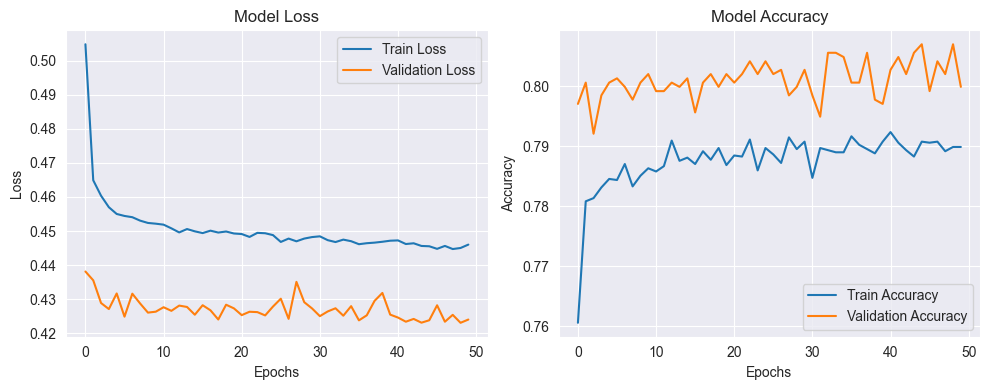

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
# plotting loss for the "best" model
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# plotting accuracy for the "best" model
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()